<a href="https://colab.research.google.com/github/jaaaamj0711/kaggle_study/blob/master/Mobile%20Price%20Classification/Mobile_Price_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("/content/drive/MyDrive/train.csv")
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
import os
import random

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

%matplotlib inline  
style.use('seaborn-muted')
sns.set(style='whitegrid',color_codes=True)

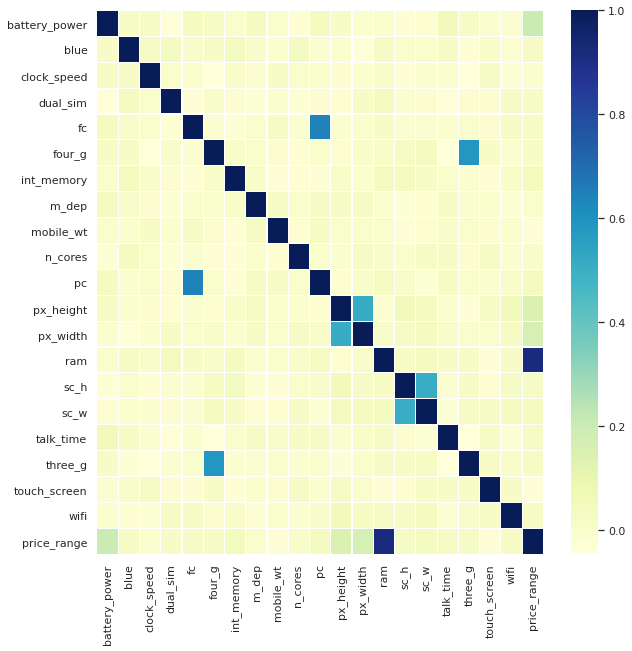

In [5]:
corr = train.corr()
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, ax = ax, cmap = 'YlGnBu',linewidth = 0.1);

- price_range와 ram은 높은 상관관계를 가지고 있습니다.
- px_height와 px_width는 높은 상관관계를 가지고 있습니다.
(각각은 픽셀 해상도 높이와 너비를 의미합니다.)
- fc와 pc는 높은 상관관계를 가지고 있습니다.
(각각은 전면 카메라 메가 픽셀, 기본카메라의 픽셀을 의미합니다.)

노트북 가격도 ram 크기에 따라서 가격이 많이 차이가 있는데 핸드폰에도 동일하게 적용이 되는 것 같습니다.


In [26]:
def hist_plot(columns):
  sns.displot(train[columns], kind='kde', height = 5, aspect = 2)
  plt.title(columns + " dist", fontsize=15)
  plt.show()

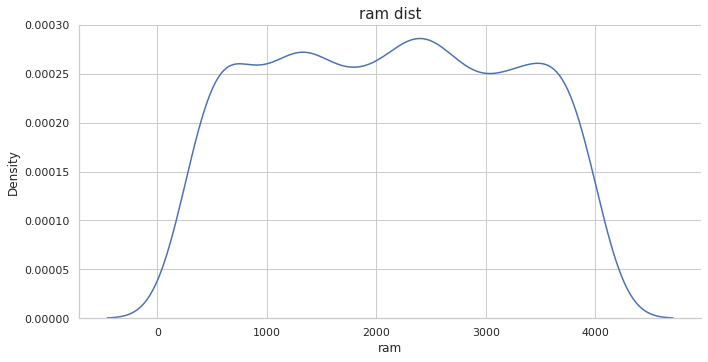

In [27]:
hist_plot("ram")

In [55]:
def cat_plot(columns_a, columns_b):
  sns.catplot(y = columns_a, x = columns_b, data = train, height = 6, aspect = 1)
  plt.title(columns_a + " & " + columns_b, fontsize=15)
  plt.show()

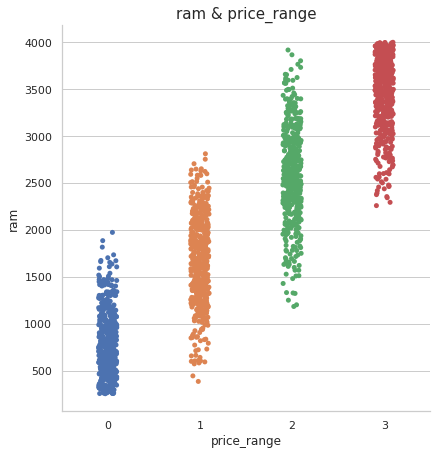

In [56]:
cat_plot('ram', 'price_range')

cat_plot은 범주형 변수와 수치형 변수의 관계를 알아볼때 사용하는 그래프입니다.  

- 램이 낮으면 가격이 낮고, 램이 높으면 가격이 높은것을 알 수 있습니다.